$\eta=0.04$

Let the $\sigma_0$ to be matrix 
$\sigma_0=\begin{bmatrix}0.2 & 0.05 \\ 0 & 0.2\end{bmatrix}$

Take the transition matrix to be symmetric $\begin{bmatrix}0.5&0.5\\ 0.5&0.5\end{bmatrix}$

In [1]:
import GoodRegime_loader
import numpy as np
import sys
sys.path.append('..')
import nn_DF
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format='svg'

In [2]:
PATH_TRAIN='../Temp/Datav2/GoodRegimeTrain4.pklz'
PATH_NEW='../Temp/Datav2/GoodRegimeNew4.pklz'

x0=np.array([[1],[-1]])
N=100; n0=10; dimX=2; eta=0.04

training_data, validation_data, test_data,\
data_mean, data_std, label_mean, label_std=GoodRegime_loader.load_data_wrapper(PATH_TRAIN)
datas,labels,x_new=GoodRegime_loader.load_new_data(PATH_NEW)
# Prepare test data to predict
test_data_data=[x for x,y in test_data]
test_data_label=[y for x,y in test_data]
test_data_label=np.array(test_data_label)
test_data_label=test_data_label.reshape(len(test_data_label),2)
len(training_data)

16956

In [3]:
net=nn_DF.Network([20,32,16,8,8,2])

In [5]:
tcMSE_constlr1, tcRel_constlr1, ecMSE_constlr1, ecRel_constlr1, w_constlr1, b_constlr1,constlr1\
=net.SGD_Constlr(training_data, 100, 64, 0.001, evaluation_data=validation_data)
tcMSE_constlr5, tcRel_constlr5, ecMSE_constlr5, ecRel_constlr5, w_constlr5, b_constlr5, constlr5\
=net.SGD_Constlr(training_data, 100, 64, 0.005, evaluation_data=validation_data)
tcMSE_constlr6, tcRel_constlr6, ecMSE_constlr6, ecRel_constlr6, w_constlr6, b_constlr6, constlr6\
=net.SGD_Constlr(training_data, 100, 64, 0.01, evaluation_data=validation_data)

-----------------------------
Constant learning rate begins.
Initial eta is: 0.001
The eta of Epoch 0 is 0.001
Epoch 0: 0.5530935264225314
The eta of Epoch 1 is 0.001
Epoch 1: 0.5333036725931233
The eta of Epoch 2 is 0.001
Epoch 2: 0.5122390126613231
The eta of Epoch 3 is 0.001
Epoch 3: 0.48818666217493395
The eta of Epoch 4 is 0.001
Epoch 4: 0.4600421682377518
The eta of Epoch 5 is 0.001
Epoch 5: 0.42632739654339935
The eta of Epoch 6 is 0.001
Epoch 6: 0.38693979843011217
The eta of Epoch 7 is 0.001
Epoch 7: 0.3446993382876589
The eta of Epoch 8 is 0.001
Epoch 8: 0.30490960074096685
The eta of Epoch 9 is 0.001
Epoch 9: 0.27342668899625355
The eta of Epoch 10 is 0.001
Epoch 10: 0.25170454149424115
The eta of Epoch 11 is 0.001
Epoch 11: 0.23802313012768034
The eta of Epoch 12 is 0.001
Epoch 12: 0.2288897952318422
The eta of Epoch 13 is 0.001
Epoch 13: 0.22179267759611923
The eta of Epoch 14 is 0.001
Epoch 14: 0.21624448228454624
The eta of Epoch 15 is 0.001
Epoch 15: 0.2119096512094191


In [6]:
tcMSE_EpochAdalr1,tcRel_EpochAdalr1, ecMSE_EpochAdalr1, ecRel_EpochAdalr1, w_EpochAdalr1, b_EpochAdalr1, EpochAdalr1\
=net.SGD_EpochAdalr(training_data,  100, 64, 0.001, 0.001, 0.01, modified=False, monitor_cost=True,evaluation_data=validation_data)
tcMSE_EpochAdalr5, tcRel_EpochAdalr5, ecMSE_EpochAdalr5, ecRel_EpochAdalr5, w_EpochAdalr5, b_EpochAdalr5, EpochAdalr5\
=net.SGD_EpochAdalr(training_data,  100, 64, 0.005, 0.001, 0.01, modified=False, monitor_cost=True,evaluation_data=validation_data)
tcMSE_EpochAdalr6, tcRel_EpochAdalr6, ecMSE_EpochAdalr6, ecRel_EpochAdalr6, w_EpochAdalr6, b_EpochAdalr6, EpochAdalr6\
=net.SGD_EpochAdalr(training_data, 100, 64, 0.01, 0.001, 0.01, modified=False, monitor_cost=True,evaluation_data=validation_data)

-----------------------------
Epoch Adaptive lr begins.
Initial eta is: 0.001
The eta of Epoch 0 is 0.001037323625481331
Epoch 0: 0.552950679638899
The eta of Epoch 1 is 0.0010706589638202417
Epoch 1: 0.5323619996004447
The eta of Epoch 2 is 0.0011105124616288924
Epoch 2: 0.5096449232763318
The eta of Epoch 3 is 0.001160382059858208
Epoch 3: 0.4824047778574054
The eta of Epoch 4 is 0.0012250049337509748
Epoch 4: 0.44766205942582293
The eta of Epoch 5 is 0.00130835533910005
Epoch 5: 0.4028671923645134
The eta of Epoch 6 is 0.001401589060532684
Epoch 6: 0.3480511679099875
The eta of Epoch 7 is 0.0014832287990509002
Epoch 7: 0.293753675306708
The eta of Epoch 8 is 0.0015583792465968687
Epoch 8: 0.25549102148154434
The eta of Epoch 9 is 0.0015881229891222476
Epoch 9: 0.23418528135438177
The eta of Epoch 10 is 0.0016182640285964966
Epoch 10: 0.22196775384426384
The eta of Epoch 11 is 0.0016580613990019944
Epoch 11: 0.21371307169500964
The eta of Epoch 12 is 0.0016709661001343768
Epoch 12: 0

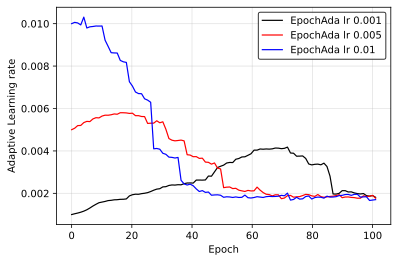

In [38]:
epochs=np.linspace(0,101,101)
plt.plot(epochs,EpochAdalr1,'k', epochs,EpochAdalr5, 'r',epochs, EpochAdalr6,'b',linewidth=1.2)
plt.grid(alpha=0.35)
plt.legend(["EpochAda lr 0.001","EpochAda lr 0.005","EpochAda lr 0.01"],edgecolor="black")
plt.xlabel("Epoch")
plt.ylabel("Adaptive Learning rate")
plt.savefig("../Temp/Imagesv2/GoodRegime_lr4.pdf", dpi=600,bbox_inches = 'tight')

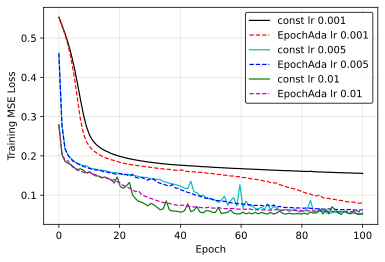

In [39]:
Epochs=np.linspace(0,100,100)
plt.plot(Epochs, tcMSE_constlr1, 'k', Epochs, tcMSE_EpochAdalr1,"r--", Epochs, tcMSE_constlr5,'c',\
         Epochs,tcMSE_EpochAdalr5,'b--',Epochs, tcMSE_constlr6,'g',Epochs,tcMSE_EpochAdalr6,'m--',linewidth=1.2)
plt.grid(alpha=0.35)
plt.legend(["const lr 0.001","EpochAda lr 0.001","const lr 0.005","EpochAda lr 0.005","const lr 0.01","EpochAda lr 0.01"],edgecolor="black")
plt.xlabel("Epoch")
plt.ylabel("Training MSE Loss")
plt.savefig("../Temp/Imagesv2/GoodRegime_loss4.pdf", dpi=600,bbox_inches = 'tight')

In [17]:
# Epochs=np.linspace(0,100,100)
# plt.plot(Epochs, tcRel_constlr1, 'k', Epochs,tcRel_EpochAdalr1,"r--",Epochs, tcRel_constlr5,'c',\
#          Epochs,tcRel_EpochAdalr5,'b--',Epochs, tcRel_constlr6,'g',Epochs,tcRel_EpochAdalr6,'m--')
# plt.grid(alpha=0.35)
# plt.legend(["const lr 0.001","EpochAda lr 0.001","const lr 0.005","EpochAda lr 0.005","const lr 0.01","EpochAda lr 0.01"],edgecolor="black")
# plt.xlabel("Epoch")
# plt.ylabel("Training Relative Error")
#plt.savefig("../Temp/Images/GoodRegime_loss4.pdf", dpi=600,bbox_inches = 'tight')

In [ ]:
# tc_timeBasedlr,ec_timeBasedlr, w_timeBasedlr, b_timeBasedlr,timeBasedlr\
# =net.SGD_TimeBasedlr(training_data, 50, 128, 0.005, 0.001, evaluation_data=validation_data)
# tc_stepBasedlr, ec_stepBasedlr,w_stepBasedlr, b_stepBasedlr,stepBasedlr\
# =net.SGD_StepBasedlr(training_data, 50, 128, 0.005, 0.5, 10,evaluation_data=validation_data)
# tc_expBasedlr, ec_expBasedlr,w_expBasedlr,b_expBasedlr,expBasedlr\
# =net.SGD_ExpBasedlr(training_data, 50, 128, 0.005, 0.0001, evaluation_data=validation_data)

In [ ]:
# plt.plot(epochs, tc_constlr1,epochs,tc_constlr2,epochs,tc_constlr3,epochs,tc_EpochAdalr,\
#          epochs, tc_timeBasedlr,epochs,tc_stepBasedlr,epochs, tc_expBasedlr)
# plt.legend(["Const lr =0.001","Const lr =0.005","Const lr =0.01","EpochAda lr(0.005)","TimeBased lr","StepBased lr","ExpBased lr"],edgecolor='black')
# plt.xlabel("Epoch")
# plt.ylabel("Train cost")
# #plt.savefig('../size256/Images/GoodRegimeSmall_tc1.pdf', dpi=600)

### Print out relative error on test data and new data

In [10]:
def relative_err(y_true, y_pred):
    """Compute Relative Error"""
    abs_sum=np.sum(np.abs(y_true-y_pred))
    return abs_sum/(np.sum(np.abs(y_true))+np.sum(np.abs(y_pred)))

def ComputeError(pred, label,label_mean, label_std, dimX):
    pred=np.array(pred)
    pred=pred.reshape(len(pred),dimX)
    for k in range(len(pred)):
        pred[k,:]=pred[k,:]*label_std+label_mean
    RelErr=relative_err(pred, label)
    mseErr=mean_squared_error(pred, label)
    print("MSE and RelErr are: {0},{1}".format(mseErr, RelErr))

In [11]:
from sklearn.metrics import mean_squared_error
testPred_constlr1=net.predict(test_data_data, w_constlr1, b_constlr1, label=False)
testPred_constlr5=net.predict(test_data_data, w_constlr5, b_constlr5, label=False)
testPred_constlr6=net.predict(test_data_data, w_constlr6, b_constlr6, label=False)
testPred_EpochAdalr1=net.predict(test_data_data, w_EpochAdalr1, b_EpochAdalr1, label=False)
testPred_EpochAdalr5=net.predict(test_data_data, w_EpochAdalr5, b_EpochAdalr5, label=False)
testPred_EpochAdalr6=net.predict(test_data_data, w_EpochAdalr6, b_EpochAdalr6, label=False)

ComputeError(testPred_constlr1, test_data_label, label_mean, label_std, dimX)
ComputeError(testPred_constlr5, test_data_label, label_mean, label_std, dimX)
ComputeError(testPred_constlr6, test_data_label, label_mean, label_std, dimX)
ComputeError(testPred_EpochAdalr1, test_data_label, label_mean, label_std, dimX)
ComputeError(testPred_EpochAdalr5, test_data_label, label_mean, label_std, dimX)
ComputeError(testPred_EpochAdalr6, test_data_label, label_mean, label_std, dimX)

MSE and RelErr are: 0.549665868377609,0.1767973547193588
MSE and RelErr are: 0.18848467170313388,0.10092926563382315
MSE and RelErr are: 0.18298799610478128,0.1023832774184176
MSE and RelErr are: 0.2857009079306134,0.12245041737866649
MSE and RelErr are: 0.2210096343420873,0.11135657328559397
MSE and RelErr are: 0.2006420118453413,0.10536037145864763


In [12]:
newPred_constlr1=net.predict(datas, w_constlr1, b_constlr1, label=False)
newPred_constlr5=net.predict(datas, w_constlr5, b_constlr5, label=False)
newPred_constlr6=net.predict(datas, w_constlr6, b_constlr6, label=False)
newPred_EpochAdalr1=net.predict(datas, w_EpochAdalr1, b_EpochAdalr1, label=False)
newPred_EpochAdalr5=net.predict(datas, w_EpochAdalr5, b_EpochAdalr5, label=False)
newPred_EpochAdalr6=net.predict(datas, w_EpochAdalr6, b_EpochAdalr6, label=False)

ComputeError(newPred_constlr1, x_new[n0-1:], label_mean, label_std, dimX)
ComputeError(newPred_constlr5, x_new[n0-1:], label_mean, label_std, dimX)
ComputeError(newPred_constlr6, x_new[n0-1:], label_mean, label_std, dimX)
ComputeError(newPred_EpochAdalr1, x_new[n0-1:], label_mean, label_std, dimX)
ComputeError(newPred_EpochAdalr5, x_new[n0-1:], label_mean, label_std, dimX)
ComputeError(newPred_EpochAdalr6, x_new[n0-1:], label_mean, label_std, dimX)

MSE and RelErr are: 0.46534769706950674,0.1936352889264286
MSE and RelErr are: 0.2832107371692141,0.13655397361921076
MSE and RelErr are: 0.1816301065436426,0.11706746505536299
MSE and RelErr are: 0.46767852603436216,0.16000292380562064
MSE and RelErr are: 0.3965451713939576,0.16440128770926532
MSE and RelErr are: 0.3521323295284746,0.15445235441233424


### Repeat 256 times Monte Carlo

In [47]:
import GoodRegime_generator
N_sample=256
TotalDatas=[]; TotalLabels=np.zeros(((N-n0+2)*N_sample,dimX))
for i in range(256):
    datas1, labels1, x_new1=GoodRegime_generator.generate_new_data(data_mean, data_std)
    TotalDatas.extend(datas1)
    x_new1=x_new1[n0-1:]
    TotalLabels[i*(N-n0+2):(i+1)*(N-n0+2)]=x_new1

In [48]:
NewPred_constlr1=net.predict(TotalDatas, w_constlr1, b_constlr1, label=False)
NewPred_constlr5=net.predict(TotalDatas, w_constlr5, b_constlr5, label=False)
NewPred_constlr6=net.predict(TotalDatas, w_constlr6, b_constlr6, label=False)
NewPred_EpochAdalr1=net.predict(TotalDatas, w_EpochAdalr1, b_EpochAdalr1, label=False)
NewPred_EpochAdalr5=net.predict(TotalDatas, w_EpochAdalr5, b_EpochAdalr5, label=False)
NewPred_EpochAdalr6=net.predict(TotalDatas, w_EpochAdalr6, b_EpochAdalr6, label=False)

ComputeError(NewPred_constlr1, TotalLabels, label_mean, label_std, dimX)
ComputeError(NewPred_constlr5, TotalLabels, label_mean, label_std, dimX)
ComputeError(NewPred_constlr6, TotalLabels, label_mean, label_std, dimX)
ComputeError(NewPred_EpochAdalr1, TotalLabels, label_mean, label_std, dimX)
ComputeError(NewPred_EpochAdalr5, TotalLabels, label_mean, label_std, dimX)
ComputeError(NewPred_EpochAdalr6, TotalLabels, label_mean, label_std, dimX)

MSE and RelErr are: 0.5863871229520923,0.183758410011022
MSE and RelErr are: 0.20335559392326719,0.1069823745218021
MSE and RelErr are: 0.19322767262146895,0.10750253367527819
MSE and RelErr are: 0.31639477202201616,0.1307665708104241
MSE and RelErr are: 0.24190023826687423,0.11847187604522014
MSE and RelErr are: 0.21760476616738061,0.11156679266302277


### Plot on new data

In [13]:
tcMSE_constlr2, tcRel_constlr2, ecMSE_constlr2, ecRel_constlr2, w_constlr2, b_constlr2, constlr2 \
=net.SGD_Constlr(training_data, 100, 64, 0.002, evaluation_data=validation_data)
tcMSE_EpochAdalr2, tcRel_EpochAdalr2, ecMSE_EpochAdalr2, ecRel_EpochAdalr2, w_EpochAdalr2, b_EpochAdalr2, EpochAdalr2\
= net.SGD_EpochAdalr(training_data, 100, 64, 0.002, 0.001, 0.01, evaluation_data=validation_data)

-----------------------------
Constant learning rate begins.
Initial eta is: 0.002
The eta of Epoch 0 is 0.002
Epoch 0: 0.5335062434188417
The eta of Epoch 1 is 0.002
Epoch 1: 0.4894575379605649
The eta of Epoch 2 is 0.002
Epoch 2: 0.42729503863436585
The eta of Epoch 3 is 0.002
Epoch 3: 0.3463233511287646
The eta of Epoch 4 is 0.002
Epoch 4: 0.27396866847275975
The eta of Epoch 5 is 0.002
Epoch 5: 0.2388194375277411
The eta of Epoch 6 is 0.002
Epoch 6: 0.22181547862227158
The eta of Epoch 7 is 0.002
Epoch 7: 0.2121914033336492
The eta of Epoch 8 is 0.002
Epoch 8: 0.20500339281801974
The eta of Epoch 9 is 0.002
Epoch 9: 0.1998522596222876
The eta of Epoch 10 is 0.002
Epoch 10: 0.19527683731690082
The eta of Epoch 11 is 0.002
Epoch 11: 0.1912484604260931
The eta of Epoch 12 is 0.002
Epoch 12: 0.18820964571556234
The eta of Epoch 13 is 0.002
Epoch 13: 0.18575098376731874
The eta of Epoch 14 is 0.002
Epoch 14: 0.18352244284677793
The eta of Epoch 15 is 0.002
Epoch 15: 0.181467001372072
Th

In [37]:
# Epochs=np.linspace(0,100,100)
# plt.plot(Epochs, tcMSE_constlr1, Epochs, tcMSE_EpochAdalr1,"--", Epochs, tcMSE_constlr5,\
#          Epochs,tcMSE_EpochAdalr5,'--',Epochs, tcMSE_constlr6, Epochs,tcMSE_EpochAdalr6,'--',\
#          Epochs, tcMSE_constlr2, Epochs, tcMSE_EpochAdalr2,'--', linewidth=1.2)
# plt.grid(alpha=0.35)
# plt.legend(["const lr 0.001","EpochAda lr 0.001","const lr 0.005","EpochAda lr 0.005","const lr 0.01","EpochAda lr 0.01",\
#             "const lr 0.002","EpochAda lr 0.002"],edgecolor="black")
# plt.xlabel("Epoch")
# plt.ylabel("Training MSE Loss")

In [44]:
df_pred1=net.predict(datas,w_constlr6, b_constlr6,label=False)
df_pred1=np.array(df_pred1)
df_pred1=df_pred1.reshape(len(df_pred1),2)
for k in range(N-n0+2):
    df_pred1[k,:]=df_pred1[k,:]*label_std+label_mean
df_new1=[x0 for k in range(n0-1)]
df_new1=np.array(df_new1)
df_new1=df_new1.reshape(n0-1,dimX)
df_new1=np.vstack((df_new1,df_pred1))

In [45]:
df_pred3=net.predict(datas, w_EpochAdalr6, b_EpochAdalr6,label=False)
df_pred3=np.array(df_pred3)
df_pred3=df_pred3.reshape(len(df_pred3),2)
for k in range(N-n0+2):
    df_pred3[k,:]=df_pred3[k,:]*label_std+label_mean
df_new3=[x0 for k in range(n0-1)]
df_new3=np.array(df_new3)
df_new3=df_new3.reshape(n0-1,dimX)
df_new3=np.vstack((df_new3,df_pred3))

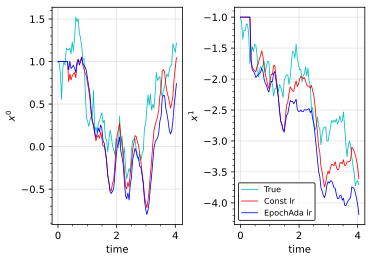

In [46]:
axis=np.linspace(0,eta*(N+1),N+1)
fig, ax=plt.subplots(1,2,figsize=(6,4))
ax[0].plot(axis,x_new[:,0],'c',axis,df_new1[:,0],'r', axis, df_new3[:,0],'b',linewidth=0.8)
ax[0].minorticks_on()
ax[0].grid(alpha=0.35)
ax[0].set_xlabel('time'); ax[0].set_ylabel('$x^0$')
#--------------------------------
ax[1].plot(axis, x_new[:,1],'c',axis,df_new1[:,1],'r',axis, df_new3[:,1],'b',linewidth=0.8)
ax[1].minorticks_on(); ax[1].grid(alpha=0.35)
ax[1].set_xlabel('time'); ax[1].set_ylabel('$x^1$')
fig.subplots_adjust(wspace=0.4, hspace=0.5)
ax[1].legend(["True","Const lr","EpochAda lr"],edgecolor="black",prop={'size':8})
plt.subplots_adjust(right=0.85)
#plt.savefig("../Temp/Imagesv2/GoodRegime_path6.pdf", dpi=600) 

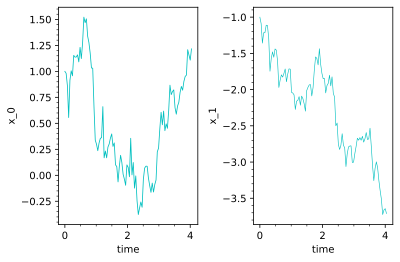

In [4]:
axis=np.linspace(0,eta*(N+1),N+1)
fig, ax=plt.subplots(1,2,figsize=(6,4))
ax[0].plot(axis,x_new[:,0],'c',linewidth=0.8)
ax[0].minorticks_on()
ax[0].set_xlabel('time'); ax[0].set_ylabel('x_0')
#--------------------------------
ax[1].plot(axis, x_new[:,1],'c',linewidth=0.6)
ax[1].minorticks_on()
ax[1].set_xlabel('time'); ax[1].set_ylabel('x_1')
fig.subplots_adjust(wspace=0.4, hspace=0.5)
#plt.savefig("../size256/Images/GoodRegimeSmall_path1.pdf",dpi=600)